# Image Classification using CIFAR-10 dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# Data Visualization

[4]


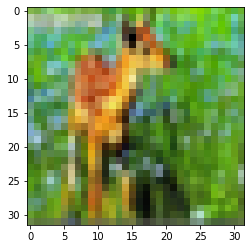

In [8]:
i = 1005
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


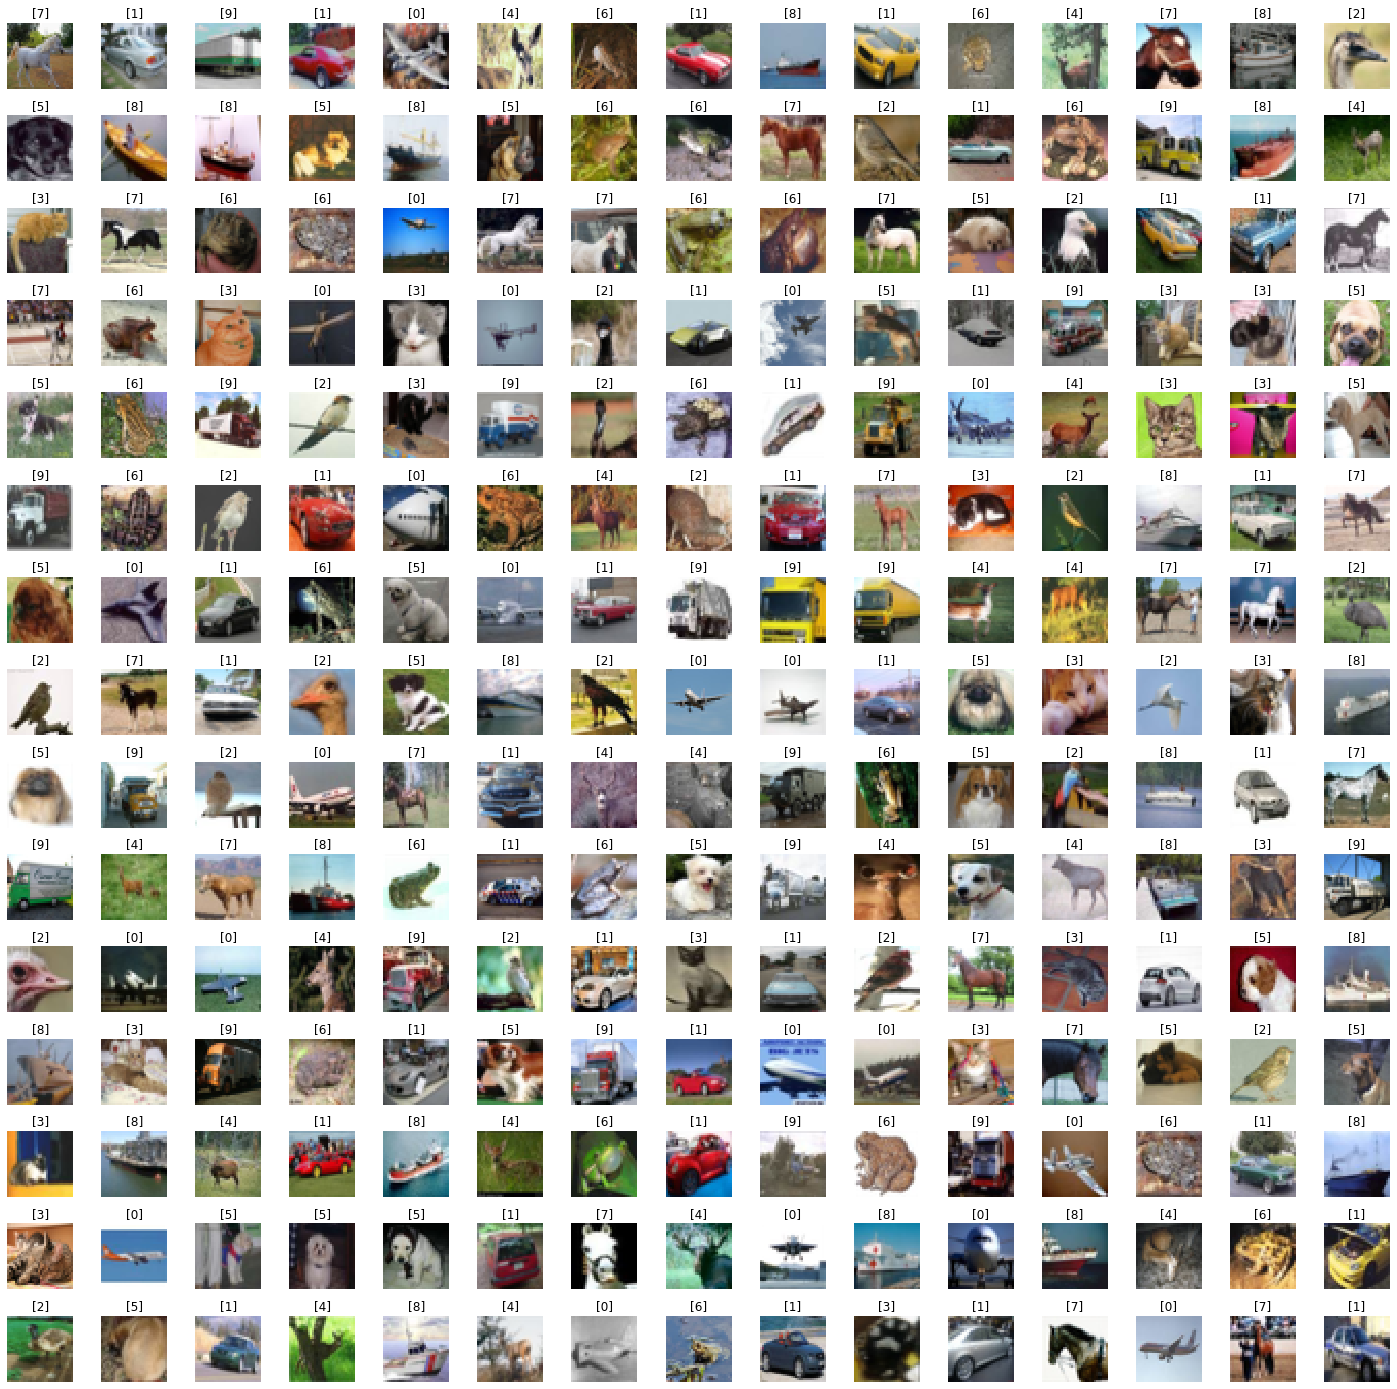

In [9]:
w_grid = 15
l_grid = 15
fig,axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel();

for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0,50000)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Data Preprocessing

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [12]:
# To bring the values of X in range on 0 to 1
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
Input_shape = X_train.shape[1:]

In [16]:
Input_shape

(32, 32, 3)

In [17]:
y_train.shape

(50000, 10)

# Training the model

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024,activation='relu'))
cnn_model.add(Dense(units = 1024,activation='relu'))

cnn_model.add(Dense(units = 10,activation='softmax'))

In [20]:
cnn_model.compile(optimizer=keras.optimizers.rmsprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)         

In [22]:
history = cnn_model.fit(X_train,y_train,batch_size= 32 ,epochs = 5,shuffle = True)

Epoch 1/5
50000/50000 [==============================] - 226s 5ms/step - loss: 1.5987 - accuracy: 0.4243
Epoch 2/5
50000/50000 [==============================] - 210s 4ms/step - loss: 1.1974 - accuracy: 0.5841
Epoch 3/5
50000/50000 [==============================] - 210s 4ms/step - loss: 1.0740 - accuracy: 0.6344
Epoch 4/5
50000/50000 [==============================] - 209s 4ms/step - loss: 1.0052 - accuracy: 0.6587
Epoch 5/5
50000/50000 [==============================] - 209s 4ms/step - loss: 0.9779 - accuracy: 0.6699


# Model Evaluation

In [24]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test Accuracy: {}".format(evaluation[1]))

10000/10000 [==============================] - 9s 919us/step
Test Accuracy: 0.6960999965667725


In [26]:
predicted_class = cnn_model.predict_classes(X_test)
predicted_class

array([3, 8, 9, ..., 5, 4, 7], dtype=int64)

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

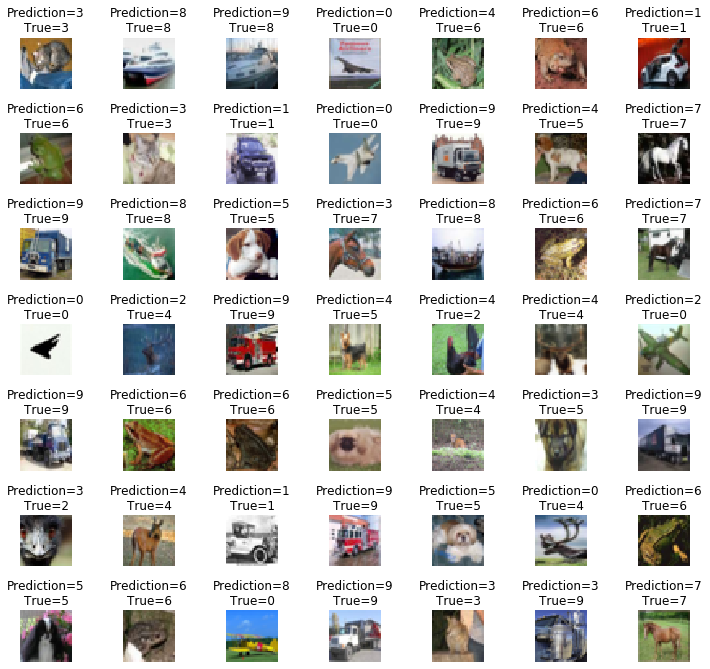

In [34]:
w = 7
l = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel();

for i in np.arange(0,l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\nTrue={}".format(predicted_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predicted_class)
cm

array([[656,  13,  98,  45,  41,   2,  19,  12,  89,  25],
       [ 13, 786,   7,  33,   7,   1,  46,   2,  32,  73],
       [ 36,   0, 569, 108, 122,  28, 101,  18,  15,   3],
       [ 10,   1,  60, 664,  59,  56, 120,  17,   9,   4],
       [ 12,   1,  37, 105, 710,   6,  87,  34,   8,   0],
       [  6,   0,  55, 394,  54, 395,  62,  30,   3,   1],
       [  1,   0,  26,  57,  24,   1, 886,   3,   2,   0],
       [  5,   0,  46, 117,  80,  32,  22, 696,   1,   1],
       [ 48,  12,  21,  34,  11,   1,  21,   3, 825,  24],
       [ 16,  36,  12,  64,   9,   2,  40,   4,  43, 774]], dtype=int64)

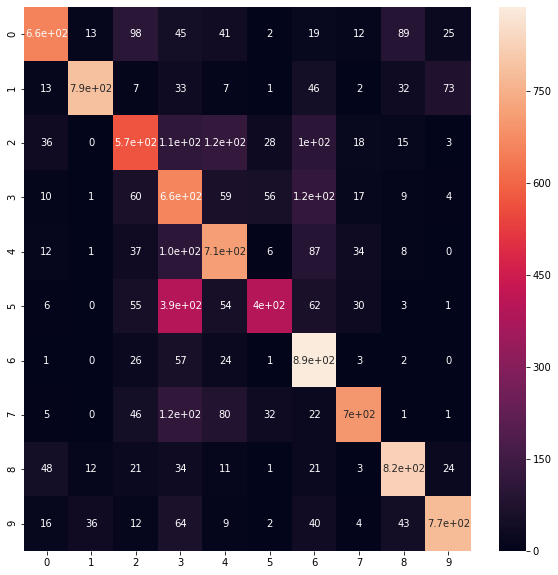

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)

# Saving the model

In [38]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)